In [15]:
try:

    import tensorflow as tf
    import cv2
    import os
    import pickle
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    print("Library Loaded Successfully ..........")
except:
    print("Library not Found ! ")


Library Loaded Successfully ..........


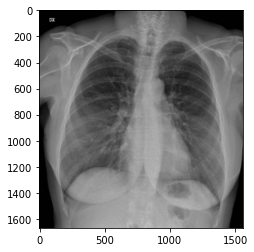

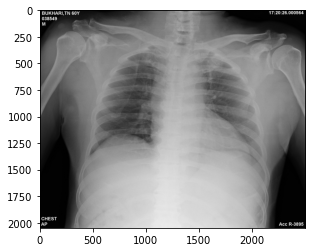

In [2]:
DATADIR = 'D:/ilmu/kuliah/TA/cnn/DATA PASIEN COVID RS UNAND/'
CATAGORIES = ["non-covid","covid"]

for categorie in CATAGORIES:
    path = os.path.join(DATADIR, categorie)
    for img in (os.listdir(path)):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break

In [3]:
print(img_array.shape)

(2048, 2500, 3)


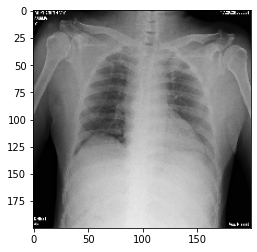

In [4]:
img_resize = 200
new_array = cv2.resize(img_array, (img_resize, img_resize))
plt.imshow(new_array, cmap='gray')
plt.show()

In [39]:
training_data = []

def create_training_data():
    for categorie in CATAGORIES:
        path = os.path.join(DATADIR, categorie)
        class_num = CATAGORIES.index(categorie)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (img_resize, img_resize))
                training_data.append([new_array, class_num])
            except:
                print("ada error nih bro")

create_training_data()


ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error nih bro
ada error 

In [36]:
print(training_data.shape)

AttributeError: 'list' object has no attribute 'shape'

In [34]:
print(len(training_data))

200


In [37]:
import random
random.shuffle(training_data)

In [9]:
# for contoh in training_data[:10]:
#     print(contoh[1])

In [38]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)


print(X[0].reshape(-1, img_resize, img_resize, 3))

X = np.array(X).reshape(-1, img_resize, img_resize, 3)




[[[[222 222 222]
   [ 45  45  45]
   [ 10  10  10]
   ...
   [101 101 101]
   [138 138 138]
   [221 221 221]]

  [[ 56  56  56]
   [  7   7   7]
   [  7   7   7]
   ...
   [  9   9   9]
   [ 16  16  16]
   [ 51  51  51]]

  [[ 13  13  13]
   [  9   9   9]
   [  9   9   9]
   ...
   [  5   5   5]
   [  6   6   6]
   [ 10  10  10]]

  ...

  [[  1   1   1]
   [  0   0   0]
   [  0   0   0]
   ...
   [ 11  11  11]
   [  8   8   8]
   [ 19  19  19]]

  [[  2   2   2]
   [  1   1   1]
   [  0   0   0]
   ...
   [ 12  12  12]
   [  8   8   8]
   [ 22  22  22]]

  [[137 137 137]
   [  0   0   0]
   [  0   0   0]
   ...
   [ 16  16  16]
   [ 15  15  15]
   [103 103 103]]]]


C:\Users\user\AppData\Local\Temp\ipykernel_2972\2270138185.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X).reshape(-1, img_resize, img_resize, 3)


ValueError: could not broadcast input array from shape (200,200,3) into shape (200,200)

In [11]:
import pandas as pd
ydf = pd.DataFrame(y)

ydf2 = ydf.reindex(index=ydf.index[::-1])
ydf2.reset_index(inplace = True)
ydf2.columns

Index(['index', 0], dtype='object')

In [12]:
ydf2 = ydf2.drop('index', axis=1)
ydf_merged = pd.concat([ydf, ydf2], axis=1)
y = ydf_merged.to_numpy()
y

array([[1, 1],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [0,

In [22]:
import pickle

In [27]:
pickle_out = open("X_train", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("X_test", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open('y_train', 'wb')
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open('y_test', 'wb')
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [24]:
pickle_in = open("X_train.pickle","rb")
X = pickle.load(pickle_in)
X[59]

array([[[ 90],
        [ 88],
        [ 87],
        ...,
        [243],
        [246],
        [247]],

       [[ 87],
        [ 87],
        [ 87],
        ...,
        [243],
        [247],
        [247]],

       [[ 87],
        [ 90],
        [ 88],
        ...,
        [242],
        [246],
        [247]],

       ...,

       [[191],
        [189],
        [190],
        ...,
        [247],
        [248],
        [159]],

       [[191],
        [191],
        [191],
        ...,
        [247],
        [248],
        [140]],

       [[193],
        [193],
        [192],
        ...,
        [248],
        [247],
        [140]]], dtype=uint8)